# **ResNet18**

`ResNet-18` is a convolutional neural network that is **18 layers deep**. You can load a pretrained version of the network trained on more than a million images from the **ImageNet database**. The pretrained network can classify images into **1000 object** categories, such as keyboard, mouse, pencil, and many animals. `ResNet18` is a **72-layer architecture** with **18 deep layers**. The architecture of this network aimed at enabling large amounts of convolutional layers to function efficiently.*However, the addition of multiple deep layers to a network often results in a degradation of the output.*
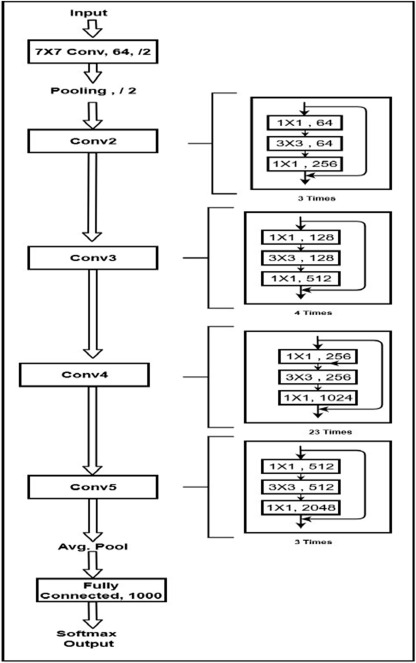

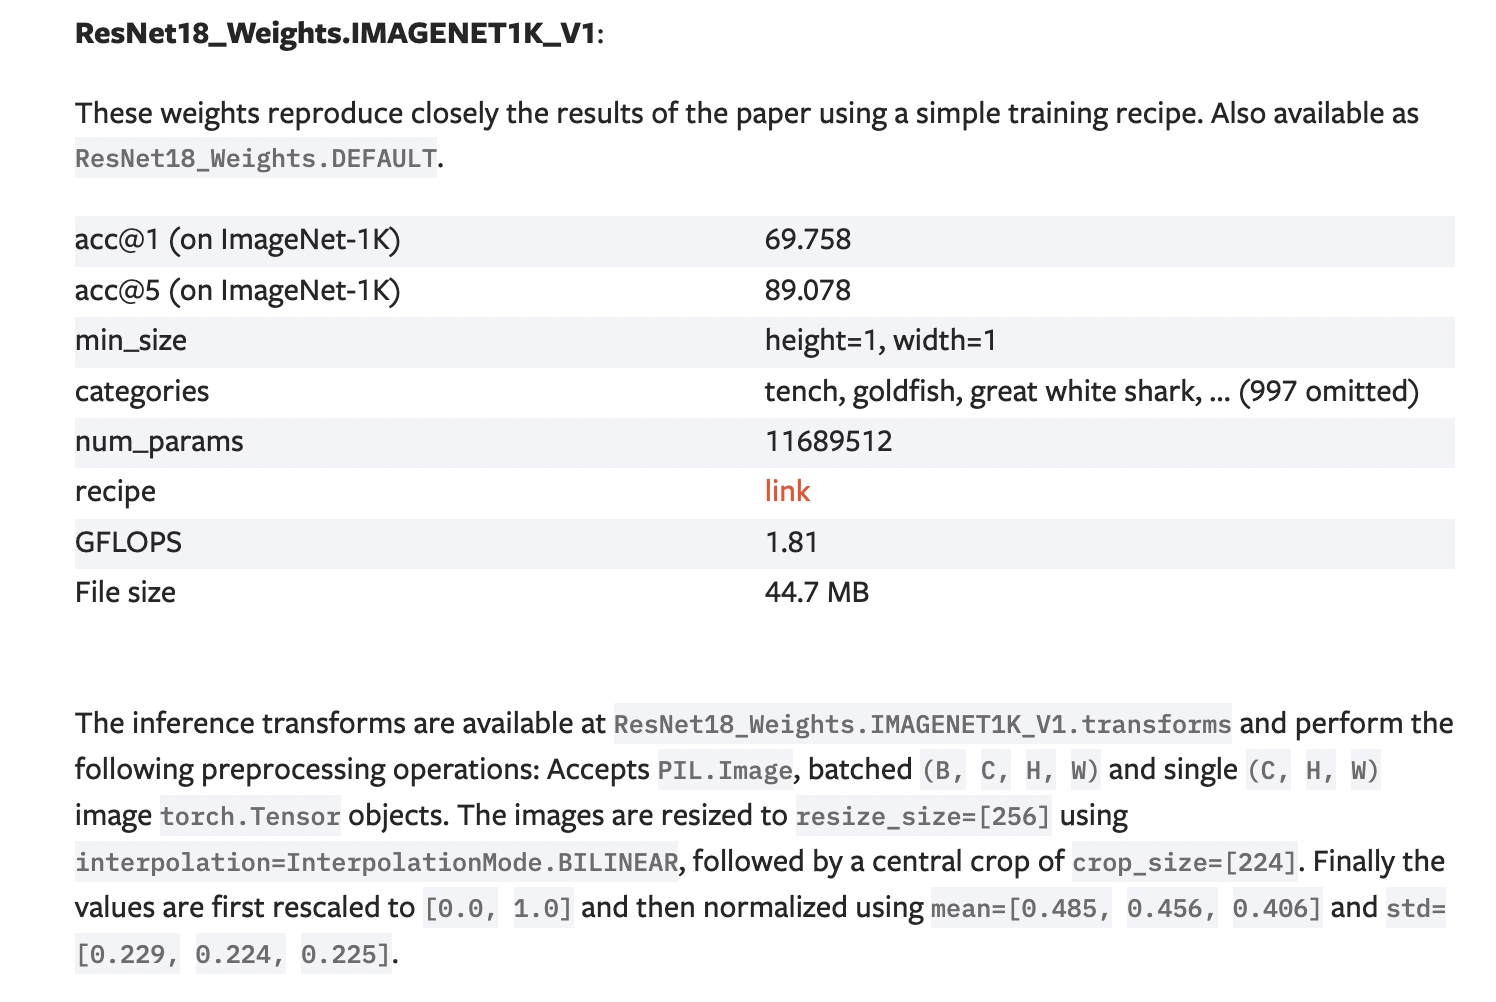

# **Let's check ResNet18 Model with CIFAR10 dataset**

In [92]:
# import libraries

import torch
import torchvision
from torchvision.datasets import CIFAR10
import matplotlib.pyplot as plt
from torchvision import transforms as T # transform function
from torch.utils.data import DataLoader, random_split 
from tqdm import tqdm # like bar graph ->
import os 

In [93]:
# check and download the data

train_data = CIFAR10(root = 'data', train = True, download = True)
test_data = CIFAR10(root = 'data', train = False, download = True)

print(f'\n The length of TRAIN data: {len(train_data)} and TEST data: {len(test_data)}')



Files already downloaded and verified
Files already downloaded and verified

 The length of TRAIN data: 50000 and TEST data: 10000


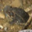

The image of 23 element is None and GT -> 6
Using MatPlot to show the results.



Text(0.5, 1.0, 'Index 23th image, GT -> 6.')

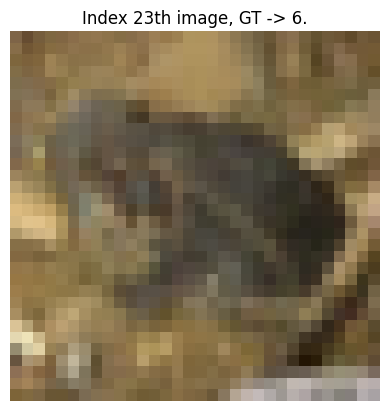

In [94]:
# check the data
x = 23

img, gt = train_data[x] 

print(f'The image of {x} element is {display(img)} and GT -> {gt}')

# with matplotlib 
print('Using MatPlot to show the results.\n')
plt.imshow(img)
plt.axis('off')
plt.title(f'Index {x}th image, GT -> {gt}.')

In [95]:
# transformations

transforms = T.Compose([
    T.ToTensor(), # normalize in range of (0:1)
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # give in ResNet docs.
])

train_data = torchvision.datasets.CIFAR10(root = './data', download = True, train = True, transform = transforms)
test_data = torchvision.datasets.CIFAR10(root = './data', download = True, train = False, transform = transforms)

# display my results after transformation

print('\nMy result after Transformation.\n')
img, gt = train_data[x]
torch.unique(img) 

Files already downloaded and verified
Files already downloaded and verified

My result after Transformation.



tensor([-1.7347, -1.6681, -1.6650, -1.5280, -1.5185, -1.4843, -1.4733, -1.4672,
        -1.4500, -1.4405, -1.4329, -1.4230, -1.4055, -1.4036, -1.3987, -1.3880,
        -1.3861, -1.3704, -1.3687, -1.3644, -1.3529, -1.3513, -1.3473, -1.3354,
        -1.3339, -1.3302, -1.3179, -1.3164, -1.3130, -1.3004, -1.2990, -1.2959,
        -1.2829, -1.2816, -1.2788, -1.2654, -1.2641, -1.2617, -1.2479, -1.2467,
        -1.2445, -1.2304, -1.2293, -1.2274, -1.2129, -1.2119, -1.2103, -1.1954,
        -1.1944, -1.1932, -1.1779, -1.1770, -1.1760, -1.1604, -1.1596, -1.1429,
        -1.1421, -1.1418, -1.1253, -1.1247, -1.1247, -1.1075, -1.1073, -1.0904,
        -1.0903, -1.0898, -1.0733, -1.0728, -1.0724, -1.0562, -1.0553, -1.0550,
        -1.0390, -1.0378, -1.0376, -1.0219, -1.0203, -1.0201, -1.0048, -1.0028,
        -1.0027, -0.9877, -0.9853, -0.9853, -0.9705, -0.9678, -0.9678, -0.9534,
        -0.9504, -0.9503, -0.9363, -0.9330, -0.9328, -0.9192, -0.9156, -0.9153,
        -0.9020, -0.8981, -0.8978, -0.88

In [96]:
train_length = int(len(train_data) * 0.85)
train_ds, validation_ds = random_split(train_data,[train_length, len(train_data) - train_length])
print(f"Train has {len(train_ds)} data.") 
print(f"Validation {len(validation_ds)} data.")
print(f"Test set {len(test_data)} data.")

Train has 42500 data.
Validation 7500 data.
Test set 10000 data.


In [97]:
# apply dataloaders

BATCH_SIZE = 32

# define dl(DataLoader) of train and validation datasets

train_dl = DataLoader(dataset = train_data, batch_size = BATCH_SIZE, shuffle = True, num_workers = 4, drop_last = False)
validation_dl = DataLoader(dataset = validation_ds, batch_size = BATCH_SIZE, shuffle = False, num_workers = 4)


# define dl(DataLoader) of test dataset

test_dl = DataLoader(dataset = test_data, batch_size = BATCH_SIZE, shuffle = False, num_workers = 4)


In [98]:
print(train_data.classes) # check dataset classes
print(train_data.data.shape)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(50000, 32, 32, 3)


(array([ 406.,  694.,  720.,  435.,  564.,  946., 1024., 1042., 1061.,
        1215., 1218., 1319., 1496., 1351., 1859., 1449., 2072., 1633.,
        1714., 2370., 1724., 2302., 1651., 1788., 2058., 1866., 2090.,
        1841., 1731., 2150., 1643., 2194., 1608., 1845., 1800., 1705.,
        1597., 1616., 1729., 1624., 1557., 1484., 1596., 1403., 1444.,
        1179., 1426., 1275., 1330., 1145., 1217., 1015., 1246., 1006.,
        1110.,  967.,  867.,  936.,  783.,  808.,  714.,  744.,  684.,
         779.,  688.,  815.,  512.,  706.,  601.,  723.,  698.,  701.,
         975.,  892.,  389.,  512.,  918.,  258.,  213.,  838.]),
 array([-2.11790395, -2.05843019, -1.99895632, -1.93948257, -1.8800087 ,
        -1.82053494, -1.76106119, -1.70158732, -1.64211357, -1.58263969,
        -1.52316594, -1.46369219, -1.40421832, -1.34474456, -1.28527069,
        -1.22579694, -1.16632318, -1.10684931, -1.04737556, -0.98790175,
        -0.92842793, -0.86895412, -0.80948031, -0.75000656, -0.69053274,
 

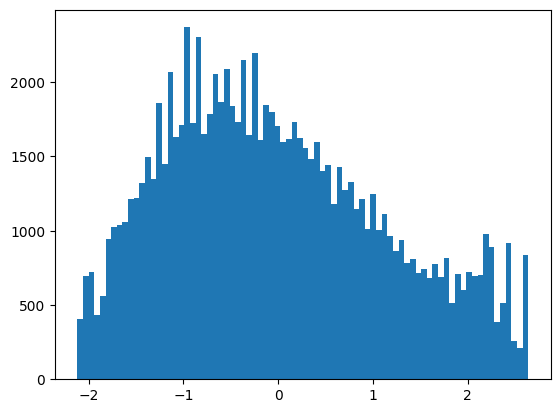

In [99]:
# show in histogram
X, y = next(iter(train_dl))
plt.hist(X.data.numpy().flatten(),80)

# **Import Model**

[Read more about ResNet18](https://www.sciencedirect.com/topics/computer-science/residual-network#:~:text=ResNet18%20is%20a%2072%2Dlayer,a%20degradation%20of%20the%20output.)

In [100]:
resnet = torchvision.models.resnet18(pretrained=True)
resnet # explore 

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [101]:
device = 'cuda'if torch.cuda.is_available() else 'cpu'

from torchsummary import summary
summary(resnet.to(device), (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 16, 16]           9,408
       BatchNorm2d-2           [-1, 64, 16, 16]             128
              ReLU-3           [-1, 64, 16, 16]               0
         MaxPool2d-4             [-1, 64, 8, 8]               0
            Conv2d-5             [-1, 64, 8, 8]          36,864
       BatchNorm2d-6             [-1, 64, 8, 8]             128
              ReLU-7             [-1, 64, 8, 8]               0
            Conv2d-8             [-1, 64, 8, 8]          36,864
       BatchNorm2d-9             [-1, 64, 8, 8]             128
             ReLU-10             [-1, 64, 8, 8]               0
       BasicBlock-11             [-1, 64, 8, 8]               0
           Conv2d-12             [-1, 64, 8, 8]          36,864
      BatchNorm2d-13             [-1, 64, 8, 8]             128
             ReLU-14             [-1, 6

In [102]:
for p in resnet.parameters():
  p.required_grad = False

In [103]:
from torch import nn
resnet.fc = nn.Linear(512,10)
print(resnet.fc)
resnet.to(device)

Linear(in_features=512, out_features=10, bias=True)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [104]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(resnet.parameters(), lr=0.003, momentum=.9)

In [105]:
# train Loop


peak_acc = 0 # this ll be the best accurency value
epochs = 11

for epoch in range(epochs):

  epoch_loss, epoch_acc, total = 0, 0, 0

  for indx, batch in tqdm(enumerate(train_dl)):

    i, gts = batch
    i, gts = i.to(device), gts.to(device)

    preds = resnet(i)
    loss = loss_function(preds,gts) # print my loss value

    total += i.shape[0] # save batch size to total
    pred_val, pred_class = torch.max(preds.data, dim = 1)

    epoch_acc += (pred_class == gts).sum().item() # calculate how many gts is equal to bt : 32 -> 25 , etc.
    epoch_loss += loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print(f"Epoch {epoch + 1} train is finished.")
  print(f"Epoch {epoch + 1} train loss : -> {epoch_loss / len(train_dl)}.")
  print(f"Epoch {epoch + 1} train accurancy :  -> {epoch_acc / total}.")

  resnet.eval()

  with torch.no_grad():
    val_epoch_loss, val_epoch_acc, val_total = 0, 0, 0
        
    for idx, batch in enumerate(validation_dl):
            i, gts = batch
            i, gts = i.to(device), gts.to(device)
            val_total += i.shape[0]
            
            preds = resnet(i) 
            loss = loss_function(preds, gts)
            _, pred_cls = torch.max(preds.data, dim = 1)
            val_epoch_loss += loss.item()
            val_epoch_acc += (pred_cls == gts).sum().item()
            
    val_acc = val_epoch_acc / val_total
        
    print(f"Epoch {epoch + 1} validation is finished.")
    print(f"Epoch {epoch + 1} validation loss -> {val_epoch_loss / len(validation_dl)}.")
    print(f"Epoch {epoch + 1} validation acc -> {val_acc}.") 

1563it [00:31, 49.94it/s]

Epoch 1 train is finished.
Epoch 1 train loss : -> 1.0210537720168926.
Epoch 1 train accurancy :  -> 0.65732.


Epoch 1 validation is finished.
Epoch 1 validation loss -> 0.5871641876849722.
Epoch 1 validation acc -> 0.8048.


1563it [00:31, 49.43it/s]

Epoch 2 train is finished.
Epoch 2 train loss : -> 0.7000382778283044.
Epoch 2 train accurancy :  -> 0.76128.


Epoch 2 validation is finished.
Epoch 2 validation loss -> 0.5251844175952546.
Epoch 2 validation acc -> 0.8229333333333333.


1563it [00:30, 50.89it/s]

Epoch 3 train is finished.
Epoch 3 train loss : -> 0.533650840527151.
Epoch 3 train accurancy :  -> 0.81826.


Epoch 3 validation is finished.
Epoch 3 validation loss -> 0.3763825595378876.
Epoch 3 validation acc -> 0.8730666666666667.


1563it [00:31, 50.36it/s]

Epoch 4 train is finished.
Epoch 4 train loss : -> 0.43811479637009626.
Epoch 4 train accurancy :  -> 0.85028.


Epoch 4 validation is finished.
Epoch 4 validation loss -> 0.4342802544540547.
Epoch 4 validation acc -> 0.8449333333333333.


1563it [00:30, 50.97it/s]

Epoch 5 train is finished.
Epoch 5 train loss : -> 0.3520670792210659.
Epoch 5 train accurancy :  -> 0.88136.


Epoch 5 validation is finished.
Epoch 5 validation loss -> 0.28788428539608385.
Epoch 5 validation acc -> 0.9009333333333334.


1563it [00:30, 50.48it/s]

Epoch 6 train is finished.
Epoch 6 train loss : -> 0.2902566887508608.
Epoch 6 train accurancy :  -> 0.9005.


Epoch 6 validation is finished.
Epoch 6 validation loss -> 0.22079765693621434.
Epoch 6 validation acc -> 0.926.


1563it [00:30, 50.63it/s]

Epoch 7 train is finished.
Epoch 7 train loss : -> 0.24578284587465604.
Epoch 7 train accurancy :  -> 0.91548.


Epoch 7 validation is finished.
Epoch 7 validation loss -> 0.17323711283822008.
Epoch 7 validation acc -> 0.94.


1563it [00:30, 51.49it/s]

Epoch 8 train is finished.
Epoch 8 train loss : -> 0.20268032381755569.
Epoch 8 train accurancy :  -> 0.93074.


Epoch 8 validation is finished.
Epoch 8 validation loss -> 0.12106141269286262.
Epoch 8 validation acc -> 0.9577333333333333.


1563it [00:32, 48.22it/s]

Epoch 9 train is finished.
Epoch 9 train loss : -> 0.17150382835850578.
Epoch 9 train accurancy :  -> 0.94124.


Epoch 9 validation is finished.
Epoch 9 validation loss -> 0.15399928760734644.
Epoch 9 validation acc -> 0.9478666666666666.


1563it [00:31, 50.23it/s]

Epoch 10 train is finished.
Epoch 10 train loss : -> 0.14939771138455765.
Epoch 10 train accurancy :  -> 0.94992.


Epoch 10 validation is finished.
Epoch 10 validation loss -> 0.11418889914342063.
Epoch 10 validation acc -> 0.9617333333333333.


1563it [00:30, 51.23it/s]

Epoch 11 train is finished.
Epoch 11 train loss : -> 0.1289487830693914.
Epoch 11 train accurancy :  -> 0.95622.


Epoch 11 validation is finished.
Epoch 11 validation loss -> 0.0751946563099293.
Epoch 11 validation acc -> 0.9730666666666666.


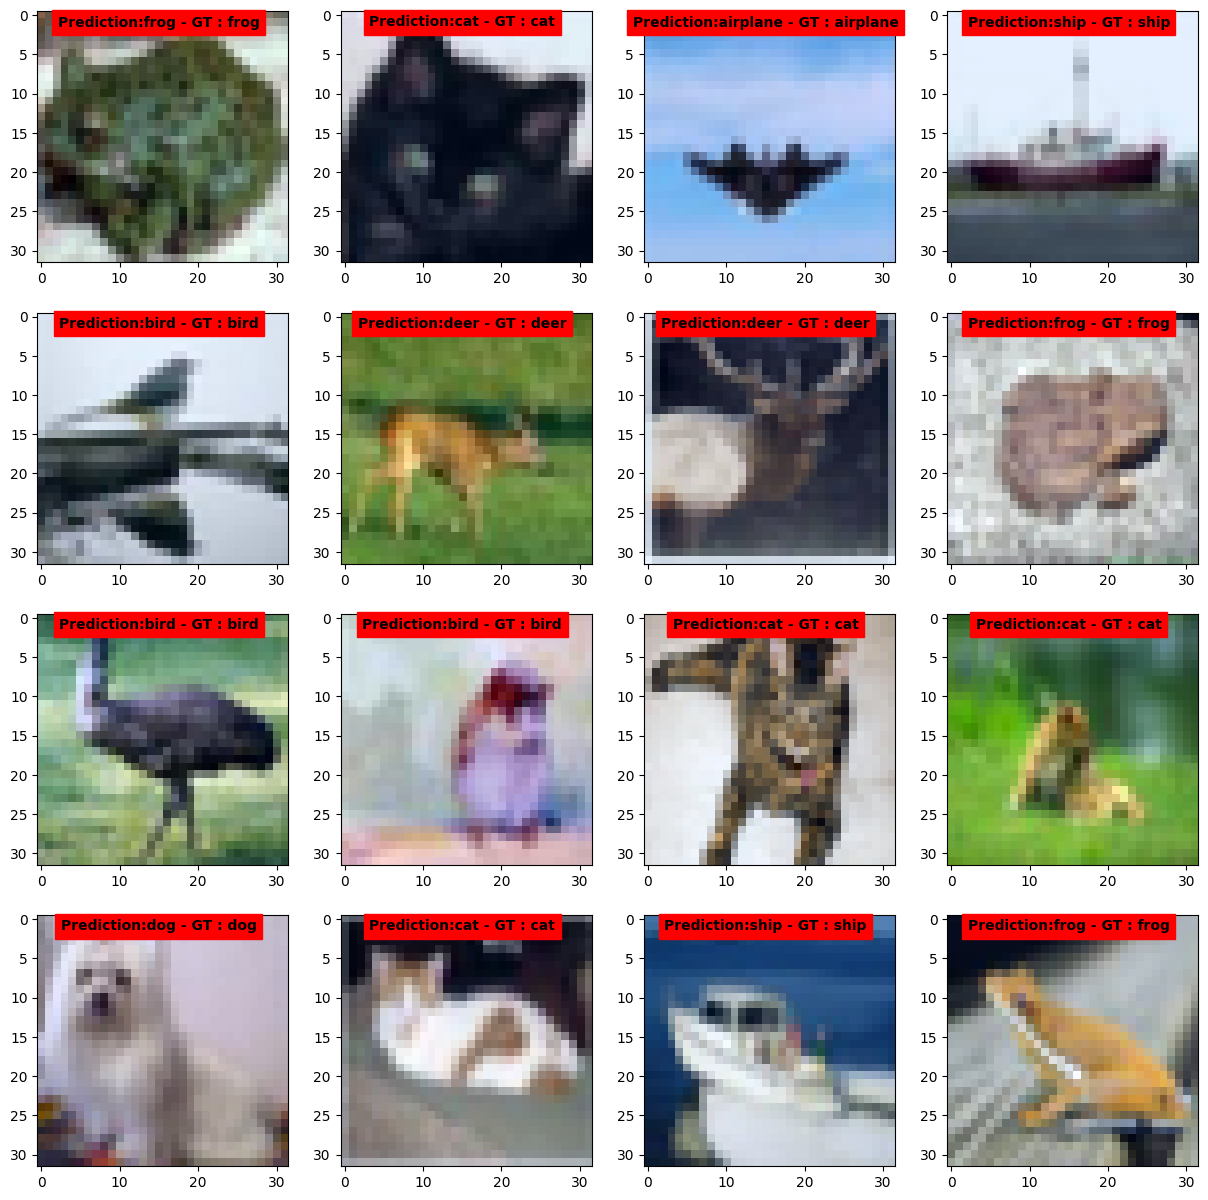

In [150]:
import numpy as np
X,y = next(iter(validation_dl))
X = X.to(device)
y = y.to(device)
resnet.eval()
predictions = torch.argmax(resnet(X), axis = 1)

fig,axs = plt.subplots(4,4,figsize=(15,15))

for (i,ax) in enumerate(axs.flatten()):
  # extract image to transpose back to 32 32 3
  pic = X.data[i].cpu().numpy().transpose((1,2,0))
  pic = pic - np.min(pic)
  pic = pic/np.max(pic)

  ax.imshow(pic)
  
  label = train_data.classes[predictions[i]]
  trueVal = train_data.classes[y[i]]
  title = f'Prediction:{label} - GT : {trueVal}'

  title_color = 'r' if trueVal == label else 'b'
  ax.text(15,0, title, ha = 'center', va= 'top', fontweight ='bold', color = 'k', backgroundcolor = title_color, fontsize = 10)

  
  

 